In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
""" Графіки для 1 файлу """

tables = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8", match="Регіон", thousands=".", decimal=",")
table = tables[0]
print(table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1     —
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

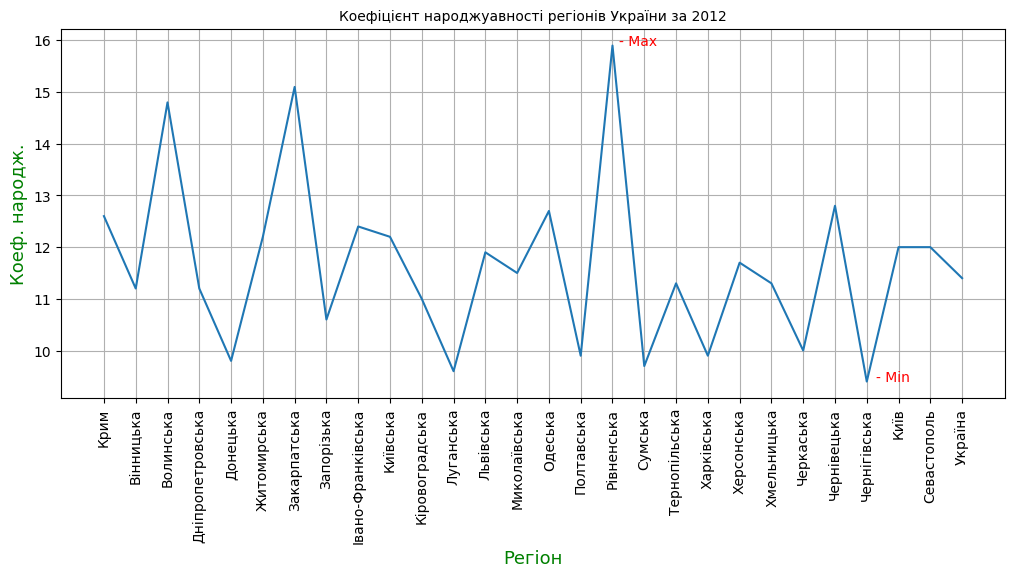

In [53]:
table_2012 = table["2012"]
plt.plot(table["Регіон"], table_2012)
plt.subplots_adjust(right=1.6)
plt.xticks(rotation='vertical')
plt.title("Коефіцієнт народжуавності регіонів України за 2012", fontsize=10)
plt.xlabel("Регіон", color="green", fontsize=13)
plt.ylabel("Коеф. народж.", color="green", fontsize=13)
plt.text(table_2012.max() + 0.3, table_2012.max(), "- Max", color="red")
plt.text(24.3, table_2012.min(), "- Min", color="red")
plt.grid()
plt.show()

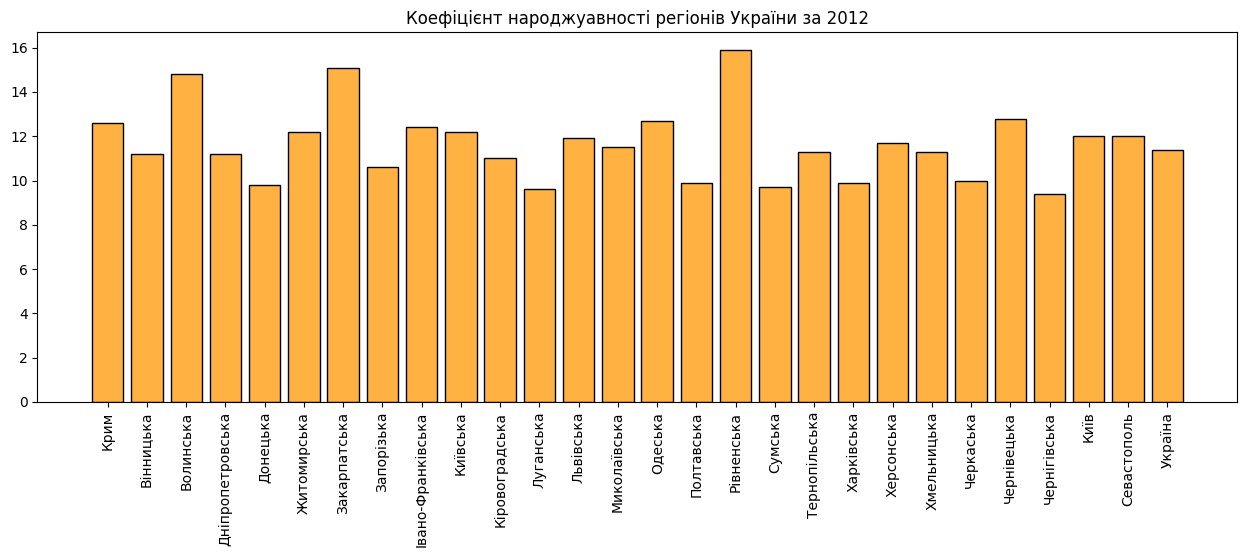

In [54]:
plt.bar(table["Регіон"], table_2012,
        color="#ffb142",
        edgecolor="black")

plt.subplots_adjust(right=2)
plt.xticks(rotation='vertical')
plt.title("Коефіцієнт народжуавності регіонів України за 2012", fontsize=12)

plt.show()

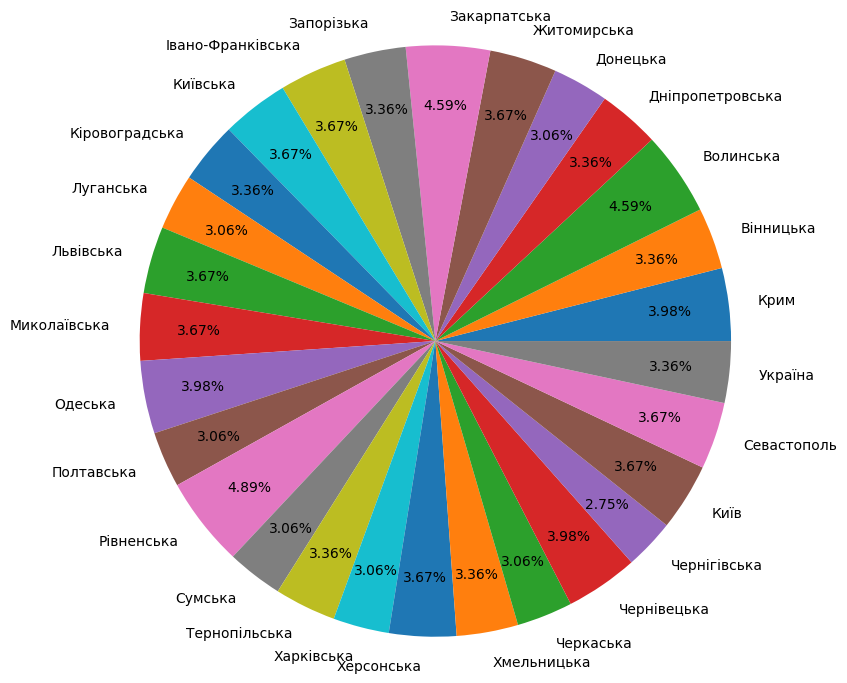

In [55]:
data = [round(i) for i in table_2012]
plt.pie(data, labels=table["Регіон"],
        radius=2,
        autopct="%.2f%%",
        pctdistance=0.8)
plt.show()

In [56]:
""" Графіки для 2 файлу """
table_1 = pd.read_csv("/content/2017_jun_final.csv")
print(table_1)

         N                 Должность Язык.программирования Специализация  \
0        1        Junior QA engineer                   NaN     Manual QA   
1        2        Junior QA engineer                   NaN     Manual QA   
2        3         Software Engineer               C#/.NET           NaN   
3        4         Software Engineer            JavaScript           NaN   
4        5  Senior Software Engineer            JavaScript           NaN   
...    ...                       ...                   ...           ...   
8699  8700               QA engineer                   NaN     Manual QA   
8700  8701                 Marketing                   NaN           NaN   
8701  8702  Junior Software Engineer            Ruby/Rails           NaN   
8702  8703                 Team lead                   NaN           NaN   
8703  8704  Senior Software Engineer                  Java           NaN   

     Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0             

In [57]:
python_data = table_1[table_1["Язык.программирования"] == "Python"]
minmax_table = python_data.groupby("Должность").agg({"Зарплата.в.месяц": ["min", "max"]})
print(minmax_table)

                         Зарплата.в.месяц      
                                      min   max
Должность                                      
Junior Software Engineer              100  1250
Senior Software Engineer             1300  9200
Software Engineer                     500  5400
System Architect                     3000  5000
Technical Lead                       1425  6200


Text(0.5, 0, 'Посада')

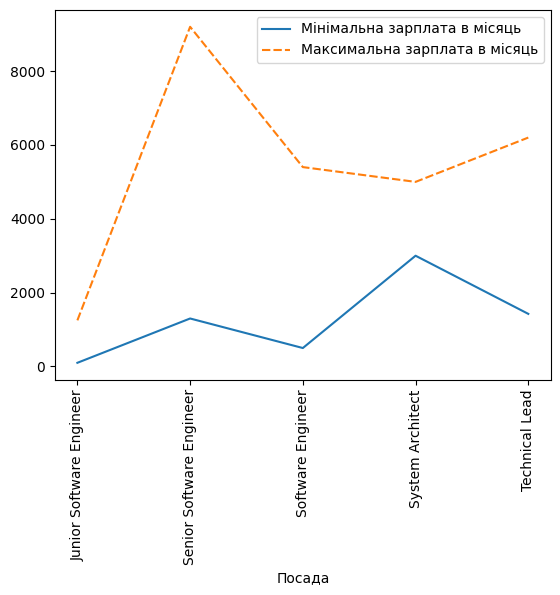

In [58]:
posada = ["Junior Software Engineer",
          "Senior Software Engineer",
          "Software Engineer",
          "System Architect",
          "Technical Lead"]
min_value = minmax_table["Зарплата.в.месяц"]["min"]
max_value = minmax_table["Зарплата.в.месяц"]["max"]

df = pd.DataFrame({"Посада": posada,
                   "Мінімальна зарплата в місяць": min_value,
                   "Максимальна зарплата в місяць": max_value})

sns.lineplot(df)
plt.xticks(rotation="vertical")
plt.xlabel("Посада")

Text(0.5, 28.999999999999986, 'Посада')

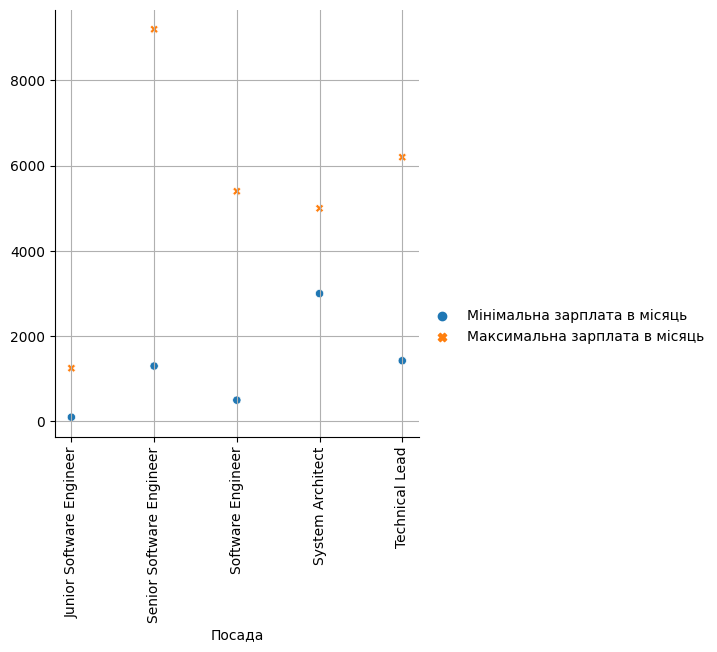

In [59]:
sns.relplot(kind="scatter", data=df)
sns.set_style({"axes.facecolor": "white",
               "xtick.color": "black"})
plt.grid()
plt.xticks(rotation="vertical")
plt.xlabel("Посада")

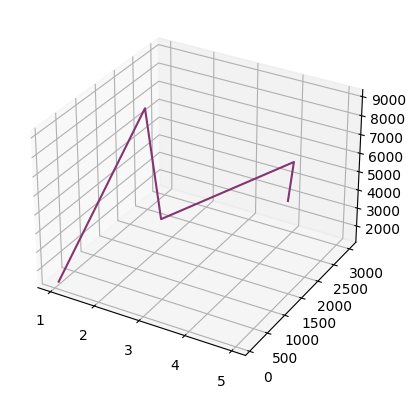

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x = [1, 2, 3, 4, 5] # Пронумерованні посади зі змінної posada
y = min_value
z = max_value
ax.plot(x, y, z, "#833471")
plt.show()

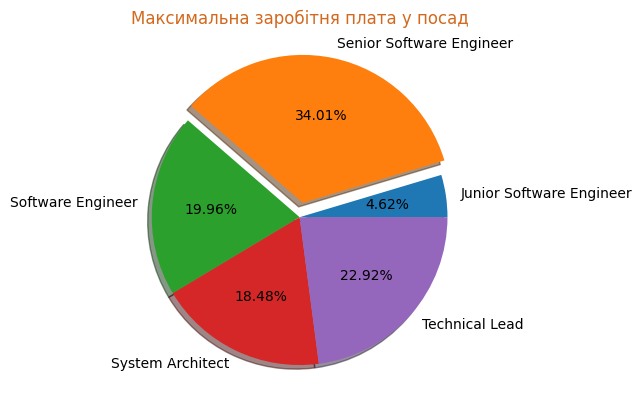

In [81]:
plt.pie(max_value,
        labels=posada,
        autopct="%.2f%%",
        shadow=True,
        explode=[0, 0.10, 0, 0, 0])
plt.title("Максимальна заробітня плата у посад", fontsize=12, color="chocolate")
plt.show()

In [88]:
""" Графіки для 3 файлу """
table_2 = pd.read_csv("/content/bestsellers with categories.csv")
print(table_2)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

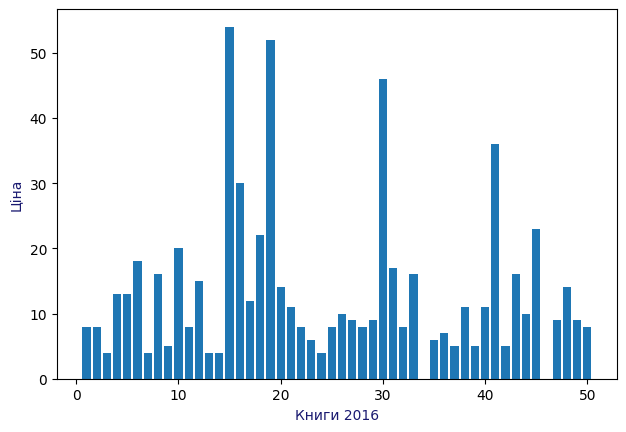

In [110]:
book_price = table_2["Price"][table_2["Year"] == 2016]
# print(book_price)
plt.bar(x=[i for i in range(1, 51)], height=book_price)
plt.xlabel("Книги 2016", color="midnightblue")
plt.ylabel("Ціна", color="midnightblue")
plt.subplots_adjust(right=1)
plt.show()

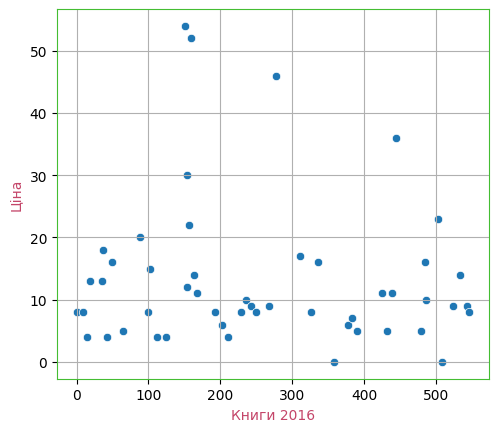

In [115]:
sns.scatterplot(data=book_price)
plt.xlabel("Книги 2016")
plt.ylabel("Ціна")
plt.subplots_adjust(right=0.8)
plt.grid()
sns.set_style({"axes.edgecolor": "#44bd32",
               "axes.labelcolor": "#c44569"})

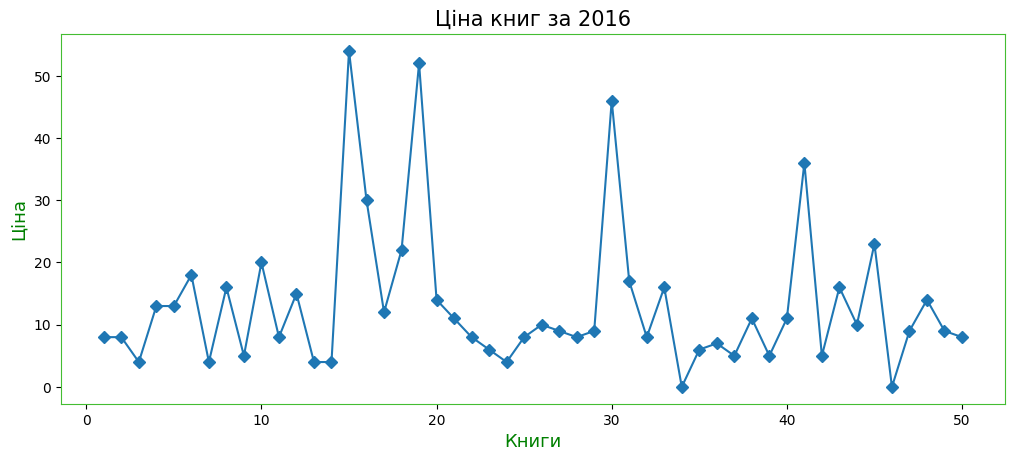

In [119]:
plt.plot([i for i in range(1, 51)], book_price, linestyle="-", marker="D")
plt.subplots_adjust(right=1.6)
plt.title("Ціна книг за 2016", fontsize=15)
plt.xlabel("Книги", color="green", fontsize=13)
plt.ylabel("Ціна", color="green", fontsize=13)
plt.show()